<a href="https://colab.research.google.com/github/Raulespz/ML_breast_cancer_detection_database/blob/main/ML_Breast_Cancer_detection_from_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This Program detects breast cancer, based of the data.
# This Project was developed usig the cosecuetly video where in the description
# of the video is there a link containing the whole code:
# https://www.youtube.com/watch?v=NSSOyhJBmWY&list=PL6Cv4syU2XmYPRL1uXbpJ1gln1Osc_aL1&index=3&t=2650s

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Is harnessed adjacent to matplotlib to do a representation like an excel of graphics of bars representation.


In [ ]:
#Load the data
from google.colab import drive # Use to load data on Google Colab #
df = pd.read_csv('/content/drive/My Drive/data.csv')
df.head (7)

#uploaded = drive.upload() # Use to load data on Google Colab
#df = pd.read_csv('data.csv')



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [ ]:
# Count the rows and columns in the data set
df.shape


(569, 33)

In [ ]:
# Count the number of empty (NaN, NAN, na) values in each column
df.isna().sum()# isna give you the Detect missing values.


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Drop the column with all missing values
df = df.dropna(axis=1) # this function Remove missing values(dropna). in this case ...
# ... this creates a new data set withouth the empty column.


In [ ]:
#Got the new count of the number of rows and columns
df.shape

(569, 32)

In [ ]:
# Get a count of the number of Malignent (M) or Benign (B) cells:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


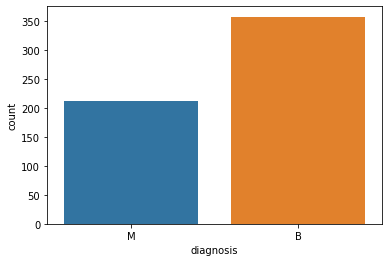

In [ ]:
# visualize the count
sns.countplot(df['diagnosis'], label='count') # Show the counts of observations in each categorical bin using bars

In [ ]:
#Look at the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Ecode the cathegorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.iloc[:,1]
# df.iloc[:,1].values # This is to show the variables M by Malign (have cancer) and B for Benign (doesn't has cancer).
# df.iloc[:,1] shows the values 0 for B and 1 for M.



0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

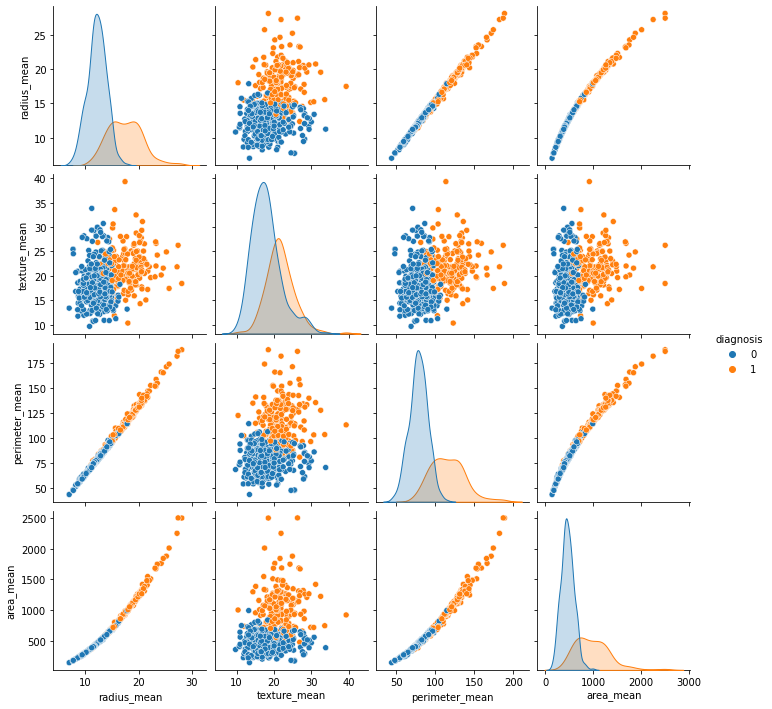

In [ ]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:6], hue='diagnosis') # Four rows for four columns.

In [ ]:
# Print the first five rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Get the correlation of the columns
df.iloc[:, 1:12].corr() #[:, 1:12] What this means is that Im getting all the...
# rows and form 1 to 11 not 12 the columns of the data frame.
# Put .corr (is get the correlation between each column)

#BEFORE THE CONSECUENTLY EXPLANATION RUN THIS CELL
# Now A little bit of the context of the results as if we have for this case
# ... radius_mean has a correlation of 0.73 with the column diagnosis...
# ... so this value represents a positive correlation for the dignosis
# ... to have that value in Diagnosis as Malign or Benign, in the other
# ... hand texture_mean has 0.415 has a low positive correlation with...
# ... the variable diagnosis so not influence a lot constracted with
# ... radius_mean, and the other values could be interpretated as this one.
# ... Finally a value of 0 means that variable does not has influence in that column.


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


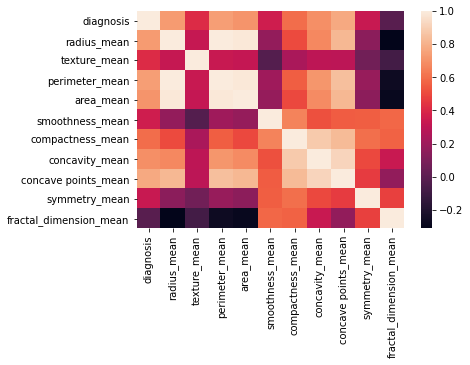

In [ ]:
#Visualize the correlation
sns.heatmap(df.iloc[:,1:12].corr()) # Plot rectangular data as a color-encoded matrix.

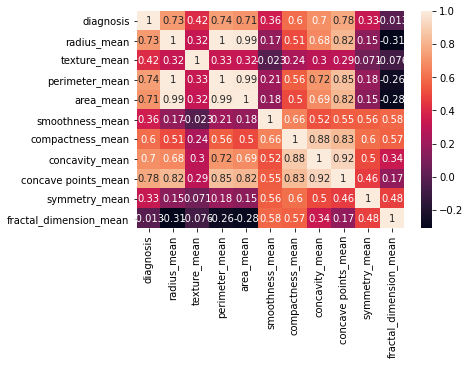

In [ ]:
# Visualizing better as the previuos one code with adding the  vlaues in
# in each cubic square, is the following:
sns.heatmap(df.iloc[:,1:12].corr(), annot=True) # annot what do this nstruction is: bool or rectangular dataset, optional
#...If True, write the data value in each cell. If an array-like with the
 #...same shape as `data`, then use this to annotate the heatmap instead
  #...of the data. Note that DataFrames will match on position, not index.


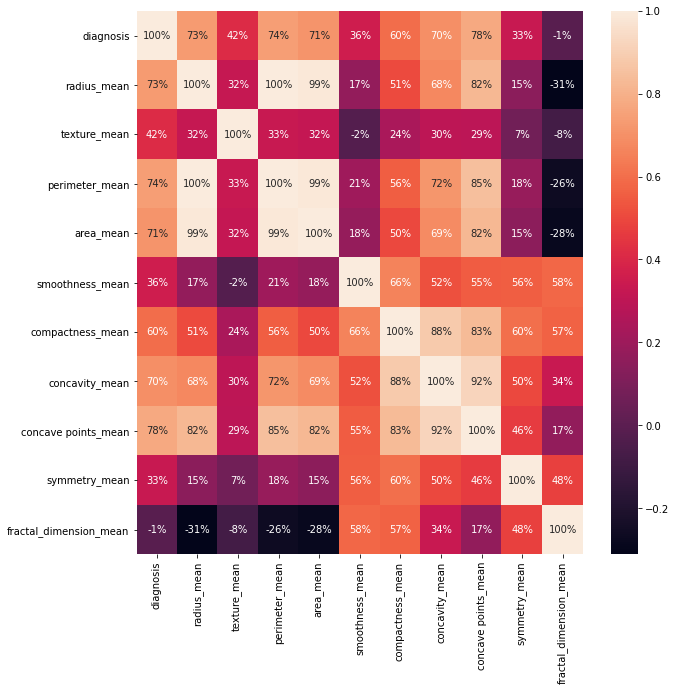

In [ ]:
# In fact we could change the size of the cell because as we could see in the
#... previous results we could see the decimals pretty well, so:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%') #fmt...
#... heslps to erase the numbers of decimals to only one.

In [ ]:
# MODEL TO CREATE TO DETECT CANCER CELLS
# split the data set into independent (x) and dependent (Y) data sets:

#the caracters "iloc#(means the position based function) we are chosing a specific data from the dataframe with that iloc
#in the following case of x = = df.iloc[:,2:31].values are all the files included although from the 3 column to 30 the number 31 column is not included.
# And the instruction (.values) only chose the values of the variables.
# In iloc Each row of the data frame represents a data sample. Hence in the x variable that are 29 columns selected represents only one sample from the same row.
# HERE IS AN EXAMPLE to select an specific row data:
# - data.iloc[0] # first row of data frame
# - data.iloc[1] # second row of data frame
# - data.iloc[-1] # last row of data frame

x = df.iloc[:,2:31].values # I'm taking into account all the rows and for the...
                    #... columns from the column 2 after diagnosis that is the column 1 to the column 31.
                    #... and not is index the column 31 so until to the 30 column.
                    #... <<<X:Help us determin throught the features that can detect
                    #... the patient has cancer or not>>>.
y = df.iloc[:,1].values    # here I'm getting all the rows and the column 1 'DIAGNOSIS' indexed
                    # (.values) is to add in an a numpy.ndarray. >>>So this is
                    #... going to say us if the patient has cancer or not
                    #... so this my TARGET VALUE>>>.
# These variables are arrays, now do it with numpy



In [ ]:
# CORE OF THE MACHINE LEARNING TO PREDICT BREAST CANCER SENSOR

In [ ]:
# 75% training 25% of the data to testing
# Split the data set into 75% training and 25% testing
# << Is necessary from that library sklearn.model_selection import the train_test_split,
# and from it make groups of the dependent and the independent variables, parameters,
# to train (from x and y) and parameters to test my AI (x_train, x_test, y_train, y_test),
# for that reason I use train_test_split to sepearate the database into train and test in the present case test size is going to
# be the 25% and a specific random state.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25 , random_state = 0) # So for the test...
                                #... it's necessary to get the random_state = and chose a number...
                                #... to get the same random result and not a different each time that we run the cell.
print('Train set :', x_train.shape, y_train.shape) # This is to now how much there are choose to each iteraction of the Train set
print('Test set :', x_test.shape, y_test.shape)    # This is to now how much there are choose to each iteraction of the Test set

print(x_train, x_test, y_train, y_test) # to recognize the variables nonetheless these print's might be unecessary.

#len(x_train)   ## To know how much items contain each variable.
#len(x_test)
#len(y_train)
#len(y_test)

Train set : (426, 29) (426,)
Test set : (143, 29) (143,)
[[1.185e+01 1.746e+01 7.554e+01 ... 1.316e-01 9.140e-02 3.101e-01]
 [1.122e+01 1.986e+01 7.194e+01 ... 1.335e-02 2.022e-02 3.292e-01]
 [2.013e+01 2.825e+01 1.312e+02 ... 3.215e-01 1.628e-01 2.572e-01]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 1.144e-01 5.052e-02 2.454e-01]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 0.000e+00 1.909e-01]
 [1.151e+01 2.393e+01 7.452e+01 ... 3.630e-01 9.653e-02 2.112e-01]] [[1.340e+01 2.052e+01 8.864e+01 ... 5.106e-01 2.051e-01 3.585e-01]
 [1.321e+01 2.525e+01 8.410e+01 ... 1.390e-01 6.005e-02 2.444e-01]
 [1.402e+01 1.566e+01 8.959e+01 ... 6.260e-02 8.216e-02 2.136e-01]
 ...
 [1.234e+01 1.227e+01 7.894e+01 ... 1.791e-01 1.070e-01 3.110e-01]
 [1.353e+01 1.094e+01 8.791e+01 ... 8.539e-02 7.407e-02 2.710e-01]
 [1.959e+01 1.815e+01 1.307e+02 ... 6.810e-01 2.247e-01 3.643e-01]] [0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0

In [ ]:
#Scale the data (feature scaling)
#So before, I make a arrays variables the x and y, consequently, was split(separate)...
#... the variables among trainings and testings arrays. And after we have to scale the data...
# Into z values that represetns how many standard deviations (s), is our value (x) from the mean (u).

#WHY STANDARIZATE THE VALUES:
#Standardization of a dataset is a common requirement for many
#machine learning estimators: they might behave badly if the
#individual features do not more or less look like standard normally
#distributed data (e.g. Gaussian with 0 mean and unit variance).
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()   # Standardize features by removing the mean and scaling to unit variance
                        # The standard score of a sample x is calculated as:     z = (x - u) / s
x_train = sc.fit_transform(x_train) # it means that x_train had been transformed to z
x_test = sc.fit_transform(x_test)  # it means that x_test had been transformed to z
#------------
# Explanation of the fit() and transform() and both: You do that on the training set of data.
# But then you have to apply the same transformation to your testing set (e.g. in cross-validation),
# or to newly obtained examples before forecast. But you have to use the exact same two
# parameters μ and σ (values) that you used for centering the training set.

#Hence, every sklearn's transform's fit() just calculates the parameters
#(e.g. μ and σ in case of StandardScaler) and saves them as an internal object's state.
 #Afterwards, you can call its transform() method to apply the transformation to any
 #particular set of examples.

#fit_transform() joins these two steps and is used for the initial fitting
#of parameters on the training set x, while also returning the transformed x′.
#Internally, the transformer object just calls first fit() and then transform()
#on the same data.
#-------------
# In synthesis from the previous explanation: #Hence, every sklearn's transform's fit() just calculates the parameters
#(e.g. μ and σ in case of StandardScaler) and saves them as an internal object's state.
 #Afterwards, you can call its transform() method to apply the transformation to any
 #particular set of examples.
print(x_train)
print(x_test)

[[-0.65079907 -0.43057322 -0.68024847 ... -0.69592933 -0.36433881
   0.32349851]
 [-0.82835341  0.15226547 -0.82773762 ... -1.29277423 -1.45036679
   0.62563098]
 [ 1.68277234  2.18977235  1.60009756 ...  0.26255563  0.72504581
  -0.51329768]
 ...
 [-1.33114223 -0.22172269 -1.3242844  ... -0.78274313 -0.98806491
  -0.69995543]
 [-1.25110186 -0.24600763 -1.28700242 ... -1.36015587 -1.75887319
  -1.56206114]
 [-0.74662205  1.14066273 -0.72203706 ...  0.47201917 -0.2860679
  -1.24094654]]
[[-0.1839902   0.22170989 -0.11761404 ...  0.97465513  1.40089716
   1.16977773]
 [-0.23927557  1.20953909 -0.30776593 ... -0.59768168 -0.79588429
  -0.81775175]
 [-0.00358531 -0.79326895 -0.07782455 ... -0.92095006 -0.46102846
  -1.35426278]
 ...
 [-0.49242436 -1.50124802 -0.52388569 ... -0.42800809 -0.0848268
   0.34236625]
 [-0.14616337 -1.77900972 -0.14818913 ... -0.82451961 -0.58355147
  -0.35440132]
 [ 1.61714893 -0.27324893  1.6440133  ...  1.69566211  1.69773906
   1.27080903]]


In [ ]:
# Create a function for the models(3) to detect breast cancer

def models(x_train, y_train):

# About the Logistic Regresion here is a very good video explanation: https://www.youtube.com/watch?v=yIYKR4sgzI8

  #Logistic Regresion
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(x_train, y_train)    #This is for train this model


# About Decision Tree is to chose from a top of a tree the principal or the root of the varibles that we have and is more reelevant fo the study it means
# that if the values are important and we have a positive value of that has cancer so this variable among (radius_mean,	texture_mean,	perimeter_mean,	area_mean
# that are included in the x varible so this could be the root of it in this case the values that are higher such are related to to cancer because to more huge that
# are the dimentions are highly provided evidence that there is cancer and we could have a positive breast cancer, that variables among the 29 using in the
# main study is going to be the root of the tree. And from the root we chose the secuentiatly of the tree the second group important variable in base of the values of the
# root... continuing doing it until to have the diagnosis if patient has or not the cancer.
# For more information check this video of explanation: https://www.youtube.com/watch?v=7VeUPuFGJHk

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(x_train, y_train)  #This is for train this model


  # Another model Random forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(x_train, y_train) #This is for train this model

  #Print the models accuracy on the train data
  print('[0] Logistic Regression Traininig Accuracy:', log.score (x_train, y_train))
  print('[0] Logistic Regression Traininig Accuracy:', tree.score (x_train, y_train))
  print('[0] Logistic Regression Traininig Accuracy:', forest.score (x_train, y_train))

  return log, tree, forest


In [ ]:
model = models(x_train, y_train)

[0] Logistic Regression Traininig Accuracy: 0.9906103286384976
[0] Logistic Regression Traininig Accuracy: 1.0
[0] Logistic Regression Traininig Accuracy: 0.9953051643192489


In [ ]:
#Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model', i)
  cm = confusion_matrix(y_test, model[i].predict(x_test)) # show us the true positives, true negatives, FP, FN

  TP = cm[0][0]  #[0][0] That tell us the position of the variables e the row 0 a the colum 0 too.
  FP = cm[0][1]
  FN = cm[1][0]
  TN = cm[1][1]

  total = TP+FP+FN+TN

  print(cm)
  print('Testing Accuracy = ', (TP+TN)/(total))
  print()

Model 0
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951

Model 1
[[83  7]
 [ 2 51]]
Testing Accuracy =  0.9370629370629371

Model 2
[[87  3]
 [ 2 51]]
Testing Accuracy =  0.965034965034965



In [ ]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
  print('Model', i)
  print( classification_report(y_test, model[0].predict(x_test)))
  print( accuracy_score(y_test, model[0].predict(x_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model 1
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model 2
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg

In [ ]:
#Print the prediction of the random forest classifier model
pred = model[2].predict(x_test)
print(pred)
print()
print(y_test)

#The fist array result is the prediction of the model of patients
# that have or not cancer. And the second one array are the second array of
# ptients that actuually has cancer it means  the real data.

# To improve the accuracy of our Machine learning we could tweak(retocar)
# some of the parameters and maybe even test other models as well better
# And as we are dealing with human lives I want that to be as close as possible to 100%.


[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
